In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Remove later
import os
os.chdir("C:/Users/Joanne/Documents/Statistics/")

# Read in the Data

In [3]:
df_tic = pd.read_table("2023-08-18-IS-tic.csv",sep=',',header=None)
df_tic.head()

,0,1,2,3,4,5,6,7,8,9,...,2790,2791,2792,2793,2794,2795,2796,2797,2798,2799
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_labels = pd.read_table("2023-08-18-MixDat.csv",sep=',')

#Double check this if correct. Only look at class column
df_labels = df_labels["class"]
df_labels.head()

0    IL
1    IL
2    IL
3    IL
4    IL
Name: class, dtype: object

# Split into train and test groups

In [5]:
from sklearn.model_selection import train_test_split
feat_train, feat_test, resp_train, resp_test = train_test_split(df_tic, df_labels, test_size=0.25)
# print(feat_train.head())

# Scale and Center Columns with Mean and Standard Deviation

In [6]:
# Code from knn_svm_python.ipynb
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# get mean and standard deviation for each column according to train data
scaler.fit(feat_train)
# scale columns of train and test data
feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

pd.DataFrame(feat_train).head()

,0,1,2,3,4,5,6,7,8,9,...,2790,2791,2792,2793,2794,2795,2796,2797,2798,2799
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Machine Learning Models:

# Logistic Regression: 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [8]:
logReg = LogisticRegression(max_iter=1500).fit(feat_train, resp_train)
logReg_yhat = logReg.predict(feat_test)

In [9]:
# print(logReg_yhat)
# print(resp_test)


# Here i made numerical representations for the sake of calculating MSE
logReg_yhat_numRep = []
resp_test_numRep = []

for i in range(len(logReg_yhat)):
    if (logReg_yhat[i] == "IL"):
        logReg_yhat_numRep.append(1)
    elif (logReg_yhat[i] == "SUB"):
        logReg_yhat_numRep.append(0)

for val in resp_test:
    if (val == "IL"):
        resp_test_numRep.append(1)
    elif (val == "SUB"):
        resp_test_numRep.append(0)

# print(logReg_yhat_numRep)
# print(resp_test_numRep)

error = mean_squared_error(logReg_yhat_numRep,resp_test_numRep,squared=False)
print(f"{error} is the MSE of logistic regression")

0.07483314773547883 is the MSE of logistic regression


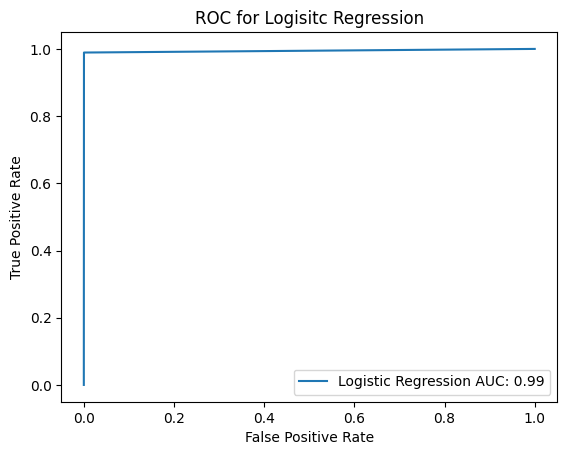

In [10]:
# Code adapted from knn_svm_python.ipynb
# Create an ROC curve for Logistic Regression
from sklearn.metrics import roc_curve, auc

# metrics for logistic regression
fpr_log, tpr_log, _ = roc_curve(resp_test_numRep, logReg_yhat_numRep)
auc_log = auc(fpr_log, tpr_log)

# plot the info
plt.plot(fpr_log, tpr_log, label='Logistic Regression AUC: {0:0.2f}'.format(auc_log))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regression')
plt.legend(loc='lower right')

# MAGIC Dataset

# Read in Data

In [16]:
# 4:50 start 
magic = pd.read_table("magic04.data",sep=',',header=None)
magic = magic.rename(columns={0: 'fLength', 1:'fWidth',2:'fSize',3:'fConc',4:'fConc1',5:'fAsym',6:'fM3Long',7:'fM3Trans',8:'fAlpha',9:'fDist',10:'class'})
magic.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [17]:
# Convert class column to categorical
magic["class"] = magic["class"].astype('category')
magic.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [19]:
# Separate features/predictors from response
magic_feats = magic.drop(columns=['class'])
magic_resp = np.array(magic['class'])

print(magic_feats[:5])
print(magic_resp)

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  
0  40.0920   81.8828  
1   6.3609  205.2610  
2  76.9600  256.7880  
3  10.4490  116.7370  
4   4.6480  356.4620  
['g' 'g' 'g' ... 'h' 'h' 'h']


# Split into Training and Testing Sets

In [21]:
from sklearn.model_selection import train_test_split
m_feat_train, m_feat_test, m_resp_train, m_resp_test = train_test_split(magic_feats, magic_resp, test_size=0.25)
print(m_feat_train.head())

       fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
17732  19.5027   8.3665  2.5115  0.7022  0.5201   9.1494  15.1227    3.8477   
12903  32.7713  26.2507  3.1780  0.2396  0.1384   0.2033  19.2363    8.8301   
17066  19.2274  10.2241  2.4298  0.6506  0.4108  -5.6524  15.4282    8.3542   
14598  56.0878  25.9763  3.0638  0.2948  0.1552   2.9482  44.3306   11.5792   
8540   40.8922  31.6046  3.0596  0.2145  0.1173  46.7407  20.8358   14.9482   

        fAlpha     fDist  
17732  54.3562  176.5708  
12903   9.8641   90.1305  
17066  61.4540  188.8200  
14598   4.9101  329.4015  
8540   18.1335  157.7770  


# Scale and Center Columns with Mean and Standard Deviation

In [22]:
# Code from knn_svm_python.ipynb
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# get mean and standard deviation for each column according to train data
scaler.fit(m_feat_train)
# scale columns of train and test data
feat_train = scaler.transform(m_feat_train)
feat_test = scaler.transform(m_feat_test)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
17732,19.5027,8.3665,2.5115,0.7022,0.5201,9.1494,15.1227,3.8477,54.3562,176.5708
12903,32.7713,26.2507,3.1780,0.2396,0.1384,0.2033,19.2363,8.8301,9.8641,90.1305
17066,19.2274,10.2241,2.4298,0.6506,0.4108,-5.6524,15.4282,8.3542,61.4540,188.8200
14598,56.0878,25.9763,3.0638,0.2948,0.1552,2.9482,44.3306,11.5792,4.9101,329.4015
8540,40.8922,31.6046,3.0596,0.2145,0.1173,46.7407,20.8358,14.9482,18.1335,157.7770


# Machine Learning Models

# Logistic Regression:

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [25]:
m_logReg = LogisticRegression(max_iter=1500).fit(m_feat_train, m_resp_train)
m_logReg_yhat = m_logReg.predict(m_feat_test)

In [35]:
# print(m_logReg_yhat)
# print(m_resp_test)


# # Here i made numerical representations for the sake of calculating MSE
m_logReg_yhat_numRep = []
m_resp_test_numRep = []

for val in m_logReg_yhat:
    if (val == "g"):
        m_logReg_yhat_numRep.append(1)
    elif (val == "h"):
        m_logReg_yhat_numRep.append(0)

for val in m_resp_test:
    if (val == "g"):
        m_resp_test_numRep.append(1)
    elif (val == "h"):
        m_resp_test_numRep.append(0)

print(m_logReg_yhat_numRep)
print(m_resp_test_numRep)

error = mean_squared_error(m_logReg_yhat_numRep,m_resp_test_numRep,squared=False)
print(f"{error} is the MSE of logistic regression")

[1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 

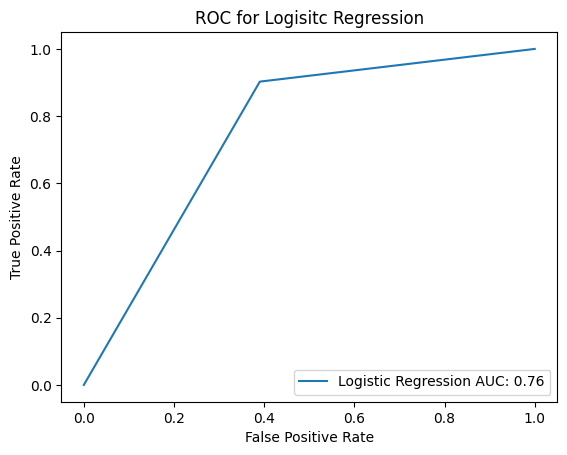

In [36]:
# Code adapted from knn_svm_python.ipynb
# Create an ROC curve for Logistic Regression
from sklearn.metrics import roc_curve, auc

# metrics for logistic regression
m_fpr_log, m_tpr_log, _ = roc_curve(m_resp_test_numRep, m_logReg_yhat_numRep)
m_auc_log = auc(m_fpr_log, m_tpr_log)

# plot the info
plt.plot(m_fpr_log, m_tpr_log, label='Logistic Regression AUC: {0:0.2f}'.format(m_auc_log))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regression')
plt.legend(loc='lower right')